## This script contains the following contents:
### 1. Create a Subset
### 2. Grouping Data
### 3. Aggregating Data

In [1]:
# Import libraries and visualilization libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker module
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\ksmak\Desktop\CareerFoundary\Instacart Basket'

In [3]:
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Working Data', 'departments_wrangled.csv'))

In [4]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
#Import pickle file using stacking command of os.path.join()

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Working Data', 'ords_prods_merged_ex4_7.pkl'))

In [6]:
# Check imported file

ords_prods_merge = ords_prods_merge.merge(df_departments, on = ['department_id'])

In [7]:
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_name,aisle_id,department_id,prices,True,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,department
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most oders,dairy eggs
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days,Most oders,dairy eggs
2,120,33120,13,0,23750,11,6,8,10.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,dairy eggs
3,327,33120,5,1,58707,21,6,9,8.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most oders,dairy eggs
4,390,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days,Most oders,dairy eggs


#### Reorder the columns

In [17]:
# drop unneeded columns

ords_prods_merge = ords_prods_merge.drop(columns=['add_to_cart_order', 'reordered', 'aisle_id', 'True'])

In [18]:
ords_prods_merge.columns.tolist()

['order_id',
 'product_id',
 'user_id',
 'order_number',
 'order_day_of_week',
 'order_time_24h',
 'days_since_prior_order',
 'product_name',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'department']

In [14]:
# Create a list of column names in the desired order

desired_order = ['order_id', 'user_id', 
                 'order_number', 'order_day_of_week', 'order_time_24h', 'days_since_prior_order', 'product_id',
                 'product_name', 'department_id','department', 'prices', 
                 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day']

In [19]:
# Reindex/rearrange the DataFrame columns

ords_prods_merge = ords_prods_merge.reindex(columns=desired_order)

In [20]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,product_name,department_id,department,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2,202279,3,5,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders
1,26,153404,2,0,16,7.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Busiest day,Busiest days,Most oders
2,120,23750,11,6,8,10.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Average orders
3,327,58707,21,6,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders
4,390,166654,48,0,12,9.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Busiest day,Busiest days,Most oders


## 1. Create a Subset

In [12]:
# Create a subset

df = ords_prods_merge[:1000000]

In [13]:
df.head()

,order_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,product_name,aisle_id,department_id,department,prices,True,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2,1,1,202279,3,5,9,8.0,33120,Organic Egg Whites,86,16,dairy eggs,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most oders
1,26,5,0,153404,2,0,16,7.0,33120,Organic Egg Whites,86,16,dairy eggs,11.3,both,Mid-range product,Busiest day,Busiest days,Most oders
2,120,13,0,23750,11,6,8,10.0,33120,Organic Egg Whites,86,16,dairy eggs,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders
3,327,5,1,58707,21,6,9,8.0,33120,Organic Egg Whites,86,16,dairy eggs,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most oders
4,390,28,1,166654,48,0,12,9.0,33120,Organic Egg Whites,86,16,dairy eggs,11.3,both,Mid-range product,Busiest day,Busiest days,Most oders


## 2. Grouping data 
### Split data into groups

In [14]:
# Use groupby() function

df.groupby('product_name')

## 3. Aggregating data
### 3.1 Single aggregation with agg()

In [15]:
df.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
16,18.274982


In [16]:
# Aggregation without agg() function

df.groupby('department_id')['order_number'].mean()

# OR df.groupby('department_id').order_number.mean()
# BUT square brackets for indexing is better! Stick to this!

department_id
16    18.274982
Name: order_number, dtype: float64

### 3.2 Multiple Aggregations

In [17]:
df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
16               18.274982   1  99

### 3.3 Combining results and Create new column

In [23]:
# Creating NEW COLUMN grouping using tranform() function

ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\ksmak\AppData\Local\Temp\ipykernel_15332\3171376029.py:3: FutureWarning: The provided callable <function amax at 0x000002EE64F61EE0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [24]:
ords_prods_merge.shape

(32404859, 16)

In [25]:
# Check if code was executed properly

ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,product_name,department_id,department,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,2,202279,3,5,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8
1,26,153404,2,0,16,7.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Busiest day,Busiest days,Most oders,32
2,120,23750,11,6,8,10.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Average orders,13
3,327,58707,21,6,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,30
4,390,166654,48,0,12,9.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Busiest day,Busiest days,Most oders,62


#### 3.3.1 Creating data flags/new column

In [26]:
# Create flag for level of customer's loyalty

ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [29]:
# Frequency count based on loyalty_flag

max_order_count = ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

In [30]:
# Access multiple columns at the same time and define numbers of returned values

ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(15)

,user_id,loyalty_flag,order_number
0,202279,New customer,3
1,153404,Regular customer,2
2,23750,Regular customer,11
3,58707,Regular customer,21
4,166654,Loyal customer,48
5,180135,Loyal customer,15
6,193223,Regular customer,6
7,91030,Regular customer,11
8,37804,Loyal customer,63
9,108932,Regular customer,16


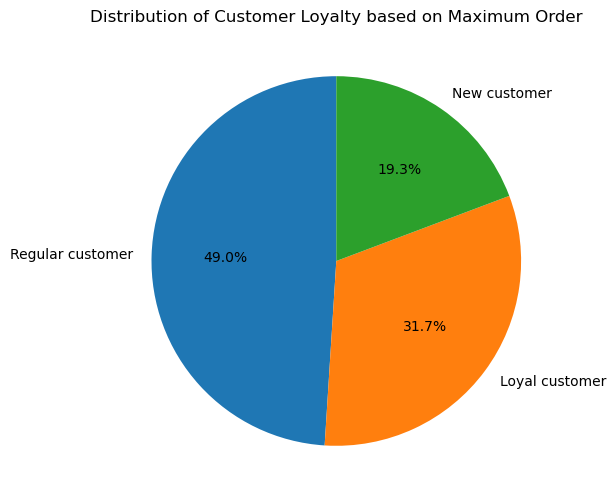

In [31]:
# Plot pie chart for the Distribution of Customer Loyalty based on Maximum Order

plt.figure(figsize=(8, 6))
max_order_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Loyalty based on Maximum Order')
plt.ylabel('')  # Remove the y-axis label

# Save the pie chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pie_max_order loyalty.png'))

# Show the pie chart

plt.show()

## Exercise 4.8

### Question2: aggregated mean of the “order_number” column grouped by “department_id” for the entire dataframe

In [27]:
# First, group the data based on the "department_id"
# Second, aggregate their "order_number" and calculate their respective means

department_mean_order = ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

In [28]:
# Sort the DataFrame by the mean order_number in descending order

department_mean_order_sorted = department_mean_order.sort_values(by=('order_number', 'mean'), ascending=False)

In [29]:
department_mean_order_sorted

,order_number
,mean
department_id,
21,22.902379
10,20.197148
18,19.310397
4,17.811403
16,17.665606
2,17.277920
7,17.225802
19,17.177343


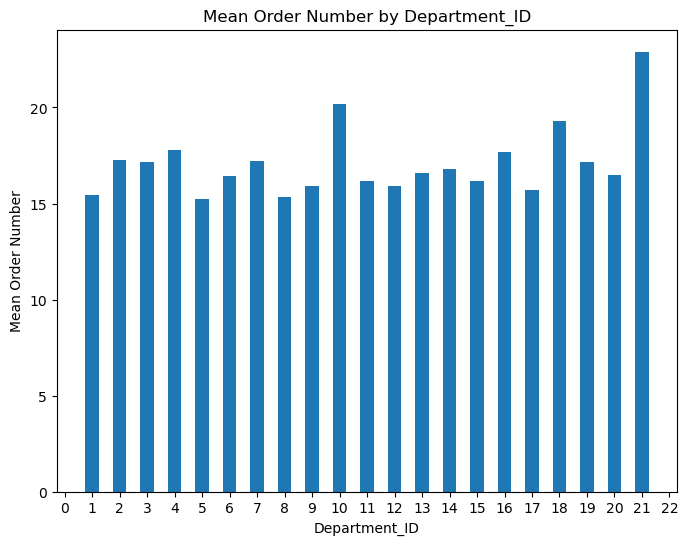

In [45]:
# Reset index to have a flat DataFrame structure
department_mean_order.reset_index(inplace=True)

# Extracting data for plotting
department_id = department_mean_order['department_id']
order_numbers = department_mean_order['order_number']['mean']

# Define the width of the bars. Adjust the value as needed
bar_width = 0.5  

# Define the width of the entire chart. Adjust the value as needed
figure_width = 8 

# Plotting. Adjusting the width of the entire chart
plt.figure(figsize=(figure_width, 6))  
plt.bar(department_id, order_numbers, color='tab:blue', width=bar_width)
plt.ylabel('Mean Order Number')
plt.xlabel('Department_ID')
plt.title('Mean Order Number by Department_ID')

# Increase tick interval on x-axis. Adjust base value as needed
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))  

# Specify the file path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'DepartmentID_OrderNumber.png')

# Save the plot
plt.savefig(file_path)


plt.show()



### Question 3: 
#### The results on the entire dataframe are slightly different from the results of the subset, but there is no pattern in how the mean values differ from each other. Departmend_id 21 (missing) have the highest mean of 22.9, follows by department_id 2 (bulk), department_id 18 (babies), and department_id 4 (produce).

### Question4: Create customer loyalty's flag using the transform() and loc() functions
#### See above - Step 3. combining the results and creating data flag

### Question 5: Check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer), and determine any difference in spending habits between them

In [29]:
# First, group the data based on the "loyalty_flag"
# Second, aggregate the "prices" on their purchased products, and then calculate their respective means

ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,7.773917
New customer,7.801661
Regular customer,7.798679


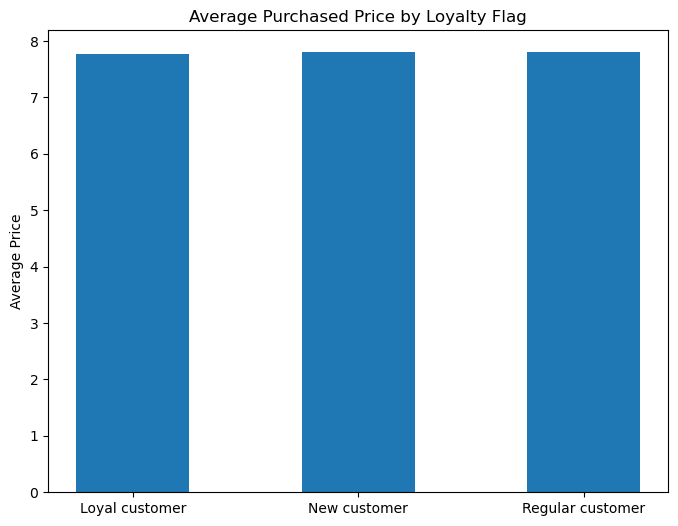

In [80]:
# ords_prods_merge is the DataFrame
loyalty_prices = ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean']})

# Reset index to have a flat DataFrame structure
loyalty_prices.reset_index(inplace=True)

# Extracting data for plotting
loyalty_flags = loyalty_prices['loyalty_flag']
mean_prices = loyalty_prices['prices']['mean']

# Define the width of the bars. Adjust this value as needed
bar_width = 0.5 

# Define the width of the entire chart. Adjust this value as needed
figure_width = 8 

# Plotting
plt.figure(figsize=(figure_width, 6))  # Adjusting the width of the entire chart
plt.bar(loyalty_flags, mean_prices, color='tab:blue', width=bar_width)
plt.ylabel('Average Price')
plt.title('Average Purchased Price by Loyalty Flag')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'purchased_price Loyalty.png'))
plt.show()

#### The means of the prices of product purchased by the the customer-loyalty groups do not show any significant differences in their spending habits, as the means are very close to each other. However, surprisingly, it looks like the "New customer" group spent the most.

In [59]:
# First, group the data based on the "loyalty_flag"
# Second, aggregate the "prices" on their purchased products, and then calculate their respective means

ords_prods_merge.groupby('loyalty_flag').agg({'order_number': ['mean']})

,order_number
,mean
loyalty_flag,
Loyal customer,32.641196
New customer,3.807044
Regular customer,12.347452


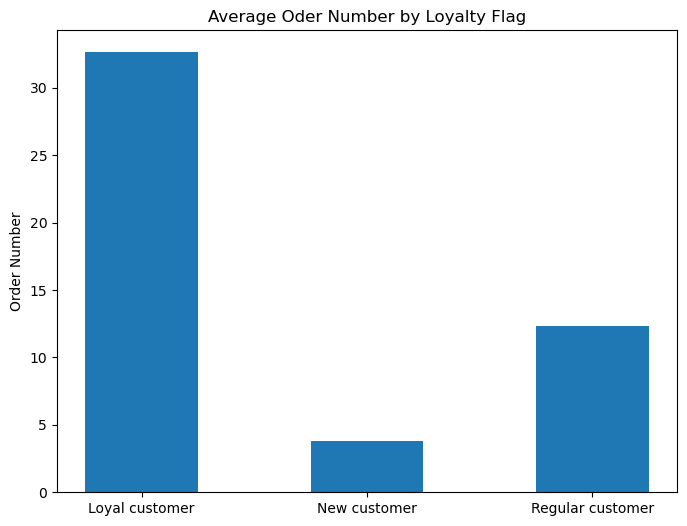

In [81]:
# ords_prods_merge is the DataFrame
loyalty_customers = ords_prods_merge.groupby('loyalty_flag').agg({'order_number': ['mean']})

# Reset index to have a flat DataFrame structure
loyalty_customers.reset_index(inplace=True)

# Extracting data for plotting
loyalty_flags = loyalty_customers['loyalty_flag']
order_numbers = loyalty_customers['order_number']['mean']

# Define the width of the bars. Adjust this value as needed
bar_width = 0.5  

# Define the width of the entire chart. Adjust this value as needed
figure_width = 8 

# Plotting. Adjusting the width of the entire chart
plt.figure(figsize=(figure_width, 6))  
plt.bar(loyalty_flags, order_numbers, color='tab:blue', width=bar_width)
plt.ylabel('Order Number')
plt.title('Average Oder Number by Loyalty Flag')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order number_Loyalty.png'))
plt.show()

#### The means of the order numbers by the the customer-loyalty groups show a significant differences in their spending habits, as the means are very close to each other. However, surprisingly, it looks like the "New customer" group spent the most.

### Question 6: Create a "spending_flag" based on, (1) If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”, and (2) If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”

In [77]:
# Group by 'user_id' and calculate the mean of 'prices'

mean_prices = ords_prods_merge.groupby('user_id')['prices'].mean()

In [78]:
mean_prices

user_id
1        6.37
2        7.52
3        8.20
4        8.21
5        9.19
         ... 
206205   8.91
206206   7.65
206207   7.31
206208   8.37
206209   7.06
Name: prices, Length: 206209, dtype: float64

In [ ]:
# Merge the mean prices back to the original DataFrame

ords_prods_merge_with_mean = ords_prods_merge.merge(mean_prices, on='user_id')

In [38]:
ords_prods_merge_with_mean.shape

(32404859, 18)

In [39]:
# Check basic statistics of "prices_y"

ords_prods_merge_with_mean.describe()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,department_id,prices_x,max_order,prices_y
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,9.919792e+00,7.791395e+00,3.305217e+01,7.791395e+00
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,6.281485e+00,4.241597e+00,2.515525e+01,7.347355e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,4.000000e+00,4.200000e+00,1.300000e+01,7.379052e+00
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,9.000000e+00,7.400000e+00,2.600000e+01,7.812418e+00
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.600000e+01,1.130000e+01,4.700000e+01,8.229798e+00
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01


In [40]:
# Rename the newly added column to represent the mean of prices

ords_prods_merge_with_mean.rename(columns={'prices_y': 'mean_prices'}, inplace=True)

In [41]:
# Check if column was renamed to "mean_prices"

ords_prods_merge_with_mean.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,product_name,department_id,department,prices_x,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices
0,2,202279,3,5,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889
1,104690,202279,8,6,10,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889
2,132412,202279,6,5,9,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889
3,2808715,202279,5,5,13,9.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889
4,2894949,202279,1,5,9,NaN,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889


In [42]:
# Create new column "spending_flag", and define low and high spender based on the mean_price spent on products purchased

ords_prods_merge_with_mean.loc[ords_prods_merge_with_mean['mean_prices'] < 10, 'spending_flag'] = 'Low spender'

ords_prods_merge_with_mean.loc[ords_prods_merge_with_mean['mean_prices'] >= 10, 'spending_flag'] = 'High spender'


In [43]:
ords_prods_merge_with_mean.shape

(32404859, 19)

In [44]:
# Check if new column "spending_flag" was created

ords_prods_merge_with_mean.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order,product_id,product_name,department_id,department,prices_x,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag
0,2,202279,3,5,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender
1,104690,202279,8,6,10,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender
2,132412,202279,6,5,9,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender
3,2808715,202279,5,5,13,9.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender
4,2894949,202279,1,5,9,NaN,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender


In [45]:
# Check frequency on "spending_flag"

ords_prods_merge_with_mean['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     32285131
High spender      119728
Name: count, dtype: int64

#### Low spender consists of 99.6% of the total customer based on the spending_flag

### Question 7: Create "frequency_flag" based on regularity of userd ordering behaviours; (1) Non-frequent customer, if median of day_since_prior_order is > 20, (2) Regular customer, if median of day_since_prior_order is > 10 and <= 20, (3) Frequent customer, if median of day_since_prior_order is <= 10, 

In [46]:
# Group the data based on the "user_id", aggregate the "day_since_prior_order" and calculate their respective medians

median_dspo = ords_prods_merge_with_mean.groupby('user_id')['days_since_prior_order'].median()

In [42]:
## mean_prices = ords_prods_merge.groupby('user_id')['prices'].mean()

In [47]:
median_dspo

user_id
1         20.5
2         13.0
3         10.0
4         20.0
5         11.0
          ... 
206205    30.0
206206     3.0
206207    16.0
206208     7.0
206209    22.0
Name: days_since_prior_order, Length: 206209, dtype: float64

In [48]:
# Merge the "median_dspo" back to the original DataFrame

ords_prods_merge_with_median = ords_prods_merge_with_mean.merge(median_dspo, on='user_id')

In [49]:
ords_prods_merge_with_median.shape

(32404859, 20)

In [50]:
# Rename the newly added column to represent the mean of prices

ords_prods_merge_with_median.rename(columns={'days_since_prior_order_y': 'median_dspo'}, inplace=True)

In [51]:
# Check if renaming was executed

ords_prods_merge_with_median.head()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order_x,product_id,product_name,department_id,department,prices_x,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_dspo
0,2,202279,3,5,9,8.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender,24.0
1,104690,202279,8,6,10,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender,24.0
2,132412,202279,6,5,9,30.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender,24.0
3,2808715,202279,5,5,13,9.0,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender,24.0
4,2894949,202279,1,5,9,NaN,33120,Organic Egg Whites,16,dairy eggs,11.3,Mid-range product,Regularly busy,Regularly busy,Most oders,8,New customer,8.618889,Low spender,24.0


In [52]:
ords_prods_merge_with_median.shape

(32404859, 20)

In [53]:
# Use For-Loops to group days into 3 categories, and only searh at ONE column
# FASTER than user-defined function

result2 = []

for value in ords_prods_merge_with_median['median_dspo']:
  if value > 20:
    result2.append('Non-frequent')
  elif value > 10 and value <= 20:
    result2.append('Regular')
  else:
    result2.append('Frequent')
 

In [58]:
# Create new column "purchased_frequency" 

ords_prods_merge_with_median['purchase_frequency'] = result2

In [59]:
# Check if new column was created

ords_prods_merge_with_median.tail()

,order_id,user_id,order_number,order_day_of_week,order_time_24h,days_since_prior_order_x,product_id,product_name,department_id,department,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_dspo,purchased_frequency,purchase_frequency
32404854,133646,162836,4,4,18,12.0,10148,Superior Puerto Rican Rum,5,alcohol,...,Least busy,Least busy,Average orders,5,New customer,6.0,Low spender,14.5,Regular,Regular
32404855,909947,162836,2,6,11,21.0,10148,Superior Puerto Rican Rum,5,alcohol,...,Regularly busy,Regularly busy,Most oders,5,New customer,6.0,Low spender,14.5,Regular,Regular
32404856,1618173,162836,3,6,23,7.0,10148,Superior Puerto Rican Rum,5,alcohol,...,Regularly busy,Regularly busy,Average orders,5,New customer,6.0,Low spender,14.5,Regular,Regular
32404857,1800496,162836,1,6,11,NaN,10148,Superior Puerto Rican Rum,5,alcohol,...,Regularly busy,Regularly busy,Most oders,5,New customer,6.0,Low spender,14.5,Regular,Regular
32404858,2334571,162836,5,0,13,17.0,10148,Superior Puerto Rican Rum,5,alcohol,...,Busiest day,Busiest days,Most oders,5,New customer,6.0,Low spender,14.5,Regular,Regular


In [60]:
# Check frequency of "purchase_frequency"

ords_prods_merge_with_median['purchase_frequency'].value_counts(dropna = False)

purchase_frequency
Frequent        21559858
Regular          7208564
Non-frequent     3636437
Name: count, dtype: int64

In [61]:
purchase_frequency_counts = ords_prods_merge_with_median['purchase_frequency'].value_counts(dropna = False)

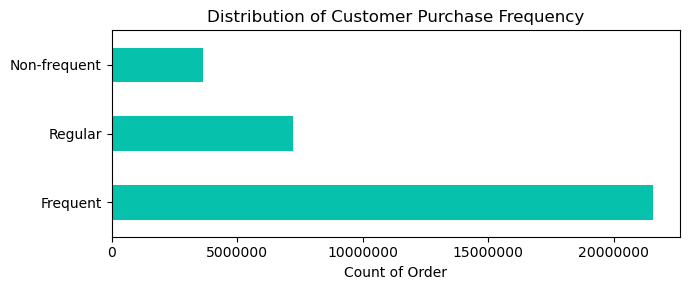

In [70]:
# Plot Horizontal Bar Chart for Distribution of purchase frequency

# Set the size of the figure
plt.figure(figsize=(7, 3))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Distribution of purchase frequency
purchase_frequency_counts_bar = purchase_frequency_counts.plot.barh(
    title='Distribution of Customer Purchase Frequency', xlabel='Count of Order', ylabel='Purchase Frequency', color='#06C2AC')

plt.ylabel('')  # Remove the y-axis label

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution of customer purchase frequency-2.png'))

# Show the plot
plt.show()

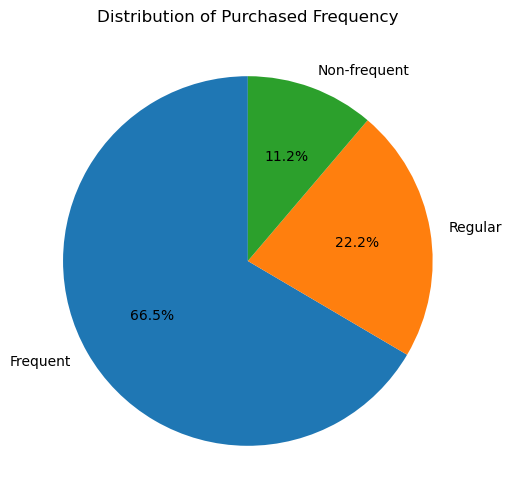

In [56]:
# Plot pie chart for the Distribution of Purchased Frequency

plt.figure(figsize=(8, 6))
purchase_frequency_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Purchased Frequency')
plt.ylabel('')  # Remove the y-axis label

# Save the pie chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pie_purchased frequency.png'))

# Show the pie chart

plt.show()

In [57]:
purchase_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'purchase_frequency1.png'))

#### Check ordering habits by Purchase Frequency

In [71]:
ords_prods_merge_with_median.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'order_day_of_week',
 'order_time_24h',
 'days_since_prior_order_x',
 'product_id',
 'product_name',
 'department_id',
 'department',
 'prices_x',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_prices',
 'spending_flag',
 'median_dspo',
 'purchased_frequency',
 'purchase_frequency']

In [72]:
ords_prods_merge_with_median = ords_prods_merge_with_median.drop(columns = ['purchased_frequency'])

In [76]:
# First, group the data based on the "purchased_frequency"
# Second, aggregate the "prices" on their purchased products, and then calculate their respective means

ords_prods_merge_with_median.groupby('purchase_frequency').agg({'prices_x': ['max']})

,prices_x
,max
purchase_frequency,
Frequent,25.00
Non-frequent,25.00
Regular,25.00
